In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.options.display.float_format = "{:.0f}".format

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px

In [2]:
import os
os.getcwd()

'C:\\Users\\hp\\Documents\\property_analysis'

In [3]:
data = pd.read_csv("./data/buyrent_properties_2021.11.01.csv")

In [4]:
data.head()

,property_title,property_location,property_area,property_bedrooms,property_bathrooms,property_description,property_agent,property_price
0,\n4 ac land for sale in Kilimani\n,"\n\nArgwings kodhek, Kilimani, Dagoretti North\n\n",\n4 ac\n,-,-,\n4 ac land for sale in Kilimani\n,-,"\nKSh 1,600,000,000\n"
1,\n4 bedroom apartment for sale in Lavington\n,"\n\nLavington, Dagoretti North\n\n",-,\n3\n,\n\n\n\n\n\n\n\n\n4\n\n,\n3 bedroom + DSQ apartment for sale in Lavington\n,Upper Deck Homes,"\nKSh 19,000,000\n"
2,\n4 bedroom apartment for sale in Lavington\n,"\n\nLavington, Dagoretti North\n\n",-,\n4\n,\n\n\n\n\n\n\n\n\n5\n\n,\n4 bedroom plus sq apartment for sale in lavingt...\n,Sarabi Realty Group,"\nKSh 17,000,000\n"
3,\n2 bedroom apartment for sale in Kilimani\n,"\n\nKILIMANI, KILIMANI, Kilimani, Dagoretti North\n\n",\n108 m²\n,\n2\n,\n\n\n\n\n\n\n\n\n2\n\n,\nMODERN AND AFFORDABLE 2 BEDROOM FOR SALE\n,Round The Clock Homes,"\nKSh 8,800,000\n"
4,\n3 bedroom apartment for sale in Rhapta Road\n,"\n\nRhapta Road, Westlands\n\n",-,\n3\n,\n\n\n\n\n\n\n\n\n4\n\n,\nRhapta Road 3 bedroom apartment for sale at 16....\n,Phillavilla,"\n KSh 16,500,000\n"


In [5]:
#columns cleaning
def column_cleaner(df,column):
    df[column] =  df[column].map(lambda x: x.lstrip('\n').rstrip('\n').lstrip())
    return df

In [6]:
data.columns

Index(['property_title', 'property_location', 'property_area',
       'property_bedrooms', 'property_bathrooms', 'property_description',
       'property_agent', 'property_price'],
      dtype='object')

In [7]:
col = ['property_title', 'property_location', 'property_area',
       'property_bedrooms', 'property_bathrooms', 'property_description', 'property_price']

for column in col :
    data= column_cleaner(data,column)

In [8]:
data.head()

,property_title,property_location,property_area,property_bedrooms,property_bathrooms,property_description,property_agent,property_price
0,4 ac land for sale in Kilimani,"Argwings kodhek, Kilimani, Dagoretti North",4 ac,-,-,4 ac land for sale in Kilimani,-,"KSh 1,600,000,000"
1,4 bedroom apartment for sale in Lavington,"Lavington, Dagoretti North",-,3,4,3 bedroom + DSQ apartment for sale in Lavington,Upper Deck Homes,"KSh 19,000,000"
2,4 bedroom apartment for sale in Lavington,"Lavington, Dagoretti North",-,4,5,4 bedroom plus sq apartment for sale in lavingt...,Sarabi Realty Group,"KSh 17,000,000"
3,2 bedroom apartment for sale in Kilimani,"KILIMANI, KILIMANI, Kilimani, Dagoretti North",108 m²,2,2,MODERN AND AFFORDABLE 2 BEDROOM FOR SALE,Round The Clock Homes,"KSh 8,800,000"
4,3 bedroom apartment for sale in Rhapta Road,"Rhapta Road, Westlands",-,3,4,Rhapta Road 3 bedroom apartment for sale at 16....,Phillavilla,"KSh 16,500,000"


In [9]:
#remove specific
data['property_price_currency'] = data.property_price.str.split(' ').str[0]
data['property_price_amount'] = data.property_price.str.split(' ').str[1]

#convert amount to integers
data['property_price_amount'] = data['property_price_amount'].str.replace(',', '')
data['property_price_amount'] = data['property_price_amount'].str.replace('\n', '').astype(float)
data.head()

,property_title,property_location,property_area,property_bedrooms,property_bathrooms,property_description,property_agent,property_price,property_price_currency,property_price_amount
0,4 ac land for sale in Kilimani,"Argwings kodhek, Kilimani, Dagoretti North",4 ac,-,-,4 ac land for sale in Kilimani,-,"KSh 1,600,000,000",KSh,1600000000
1,4 bedroom apartment for sale in Lavington,"Lavington, Dagoretti North",-,3,4,3 bedroom + DSQ apartment for sale in Lavington,Upper Deck Homes,"KSh 19,000,000",KSh,19000000
2,4 bedroom apartment for sale in Lavington,"Lavington, Dagoretti North",-,4,5,4 bedroom plus sq apartment for sale in lavingt...,Sarabi Realty Group,"KSh 17,000,000",KSh,17000000
3,2 bedroom apartment for sale in Kilimani,"KILIMANI, KILIMANI, Kilimani, Dagoretti North",108 m²,2,2,MODERN AND AFFORDABLE 2 BEDROOM FOR SALE,Round The Clock Homes,"KSh 8,800,000",KSh,8800000
4,3 bedroom apartment for sale in Rhapta Road,"Rhapta Road, Westlands",-,3,4,Rhapta Road 3 bedroom apartment for sale at 16....,Phillavilla,"KSh 16,500,000",KSh,16500000


In [10]:
# derive property type
#group the transactions
property_group = []
for row in data.itertuples():
    if 'land' in row.property_title:
        property_group.append('Land')
        
    elif 'commercial property' in row.property_title:
        property_group.append('Commercial Property')

    elif 'office' in row.property_title:
        property_group.append('Office')
   
    elif 'warehouse' in row.property_title:
        property_group.append('Warehouse')
    
    elif '1 bedroom apartment' in row.property_title:
        property_group.append('1 Bedroom Apartment')
        
    elif '1 bedroom house' in row.property_title:
        property_group.append('1 Bedroom House')
        
    elif '2 bedroom apartment' in row.property_title:
        property_group.append('2 Bedroom Apartment')
        
    elif ' 2 bedroom house' in row.property_title:
        property_group.append(' 2 Bedroom House')
        
    elif '3 bedroom apartment' in row.property_title:
        property_group.append('3 Bedroom Apartment')
        
    elif '3 bedroom house' in row.property_title:
        property_group.append('3 Bedroom House')
        
    elif '3 bedroom townhouse' in row.property_title:
        property_group.append('3 Bedroom Townhouse')
        
    elif '3 bedroom villa' in row.property_title:
        property_group.append('3 Bedroom Villa')
        
    elif '4 bedroom apartment' in row.property_title:
        property_group.append('4 Bedroom Apartment')
        
    elif '4 bedroom house' in row.property_title:
        property_group.append('4 Bedroom House')
        
    elif '4 bedroom townhouse' in row.property_title:
        property_group.append('4 Bedroom Townhouse')
        
    elif '4 bedroom villa' in row.property_title:
        property_group.append('4 Bedroom Villa')
        
    elif '5 bedroom apartment' in row.property_title:
        property_group.append('5 Bedroom Apartment')
        
    elif '5 bedroom house' in row.property_title:
        property_group.append('5 Bedroom House')
        
    elif '5 bedroom townhouse' in row.property_title:
        property_group.append('5 Bedroom Townhouse')
        
    elif '5 bedroom villa' in row.property_title:
        property_group.append('5 Bedroom Villa')
    
    elif '6 bedroom apartment' in row.property_title:
        property_group.append('6 Bedroom Apartment')
        
    elif '6 bedroom house' in row.property_title:
        property_group.append('6 Bedroom House')
        
    elif '6 bedroom townhouse' in row.property_title:
        property_group.append('6 Bedroom Townhouse')
        
    elif '6 bedroom villa' in row.property_title:
        property_group.append('6 Bedroom Villa')
        
    elif '7 bedroom apartment' in row.property_title:
        property_group.append('7 Bedroom Apartment')
        
    elif '7 bedroom house' in row.property_title:
        property_group.append('7 Bedroom House')
        
    elif '7 bedroom townhouse' in row.property_title:
        property_group.append('7 Bedroom Townhouse')
        
    elif '7 bedroom villa' in row.property_title:
        property_group.append('7 Bedroom Villa')
        
    elif '8 bedroom apartment' in row.property_title:
        property_group.append('8 Bedroom Apartment')
        
    elif '8 bedroom house' in row.property_title:
        property_group.append('8 Bedroom House')
        
    elif '8 bedroom townhouse' in row.property_title:
        property_group.append('8 Bedroom Townhouse')
        
    elif '8 bedroom villa' in row.property_title:
        property_group.append('8 Bedroom Villa')
        
    elif '9 bedroom apartment' in row.property_title:
        property_group.append('9 Bedroom Apartment')
        
    elif '9 bedroom house' in row.property_title:
        property_group.append('9 Bedroom House')
        
    elif '9 bedroom townhouse' in row.property_title:
        property_group.append('9 Bedroom Townhouse')
        
    elif '9 bedroom villa' in row.property_title:
        property_group.append('9 Bedroom Villa')
        
    elif '10 bedroom apartment' in row.property_title:
        property_group.append('10 Bedroom Apartment')
        
    elif '10 bedroom house' in row.property_title:
        property_group.append('10 Bedroom House')
        
    elif '10 bedroom townhouse' in row.property_title:
        property_group.append('10 Bedroom Townhouse')
        
    elif '10 bedroom villa' in row.property_title:
        property_group.append('10 Bedroom Villa')

    elif 'Bedsitter' in row.property_title:
        property_group.append('Bedsitter/Studio')
    
    elif 'studio' in row.property_title:
        property_group.append('Bedsitter/Studio')
        
    else :
        property_group.append('Others')
        
data['property_category'] = property_group

In [11]:
property_subgroup = []
for row in data.itertuples():
    if 'Residential land' in row.property_title:
        property_subgroup.append('Residential Land')

    elif 'Commercial land' in row.property_title:
        property_subgroup.append('Commercial Land')
        
    elif 'land' in row.property_title:
        property_subgroup.append('Land')

             
    elif 'commercial property' in row.property_title:
        property_subgroup.append('Commercial Property')

    elif 'office' in row.property_title:
        property_subgroup.append('Office')
   
    elif 'warehouse' in row.property_title:
        property_subgroup.append('Warehouse')
    
    elif 'apartment' in row.property_title:
        property_subgroup.append('Apartment')
        
    elif 'townhouse' in row.property_title:
        property_subgroup.append('Townhouse')

    elif 'house' in row.property_title:
        property_subgroup.append('House')

    elif 'villa' in row.property_title:
        property_subgroup.append('Villa')

    elif 'studio' in row.property_category:
        property_subgroup.append('Studio')
    
    else :
        property_subgroup.append('Others')

data['property_subcategory'] = property_subgroup

In [12]:
data.property_subcategory.value_counts()

Apartment              1722
Land                   713 
House                  515 
Townhouse              383 
Others                 129 
Residential Land       72  
Villa                  68  
Warehouse              31  
Office                 26  
Commercial Land        26  
Commercial Property    21  
Name: property_subcategory, dtype: int64

In [13]:
#drop properties with price <1000
data = data.loc[data['property_price_amount']>=200000]
data.shape

(3662, 12)

In [14]:
# analysis of product distribution by agent
agents_data = data.loc[data['property_subcategory']=='Apartment']

agg_agent_df = agents_data.groupby('property_agent').agg({'property_price_amount':['count','min','max','mean']})
agg_agent_df.columns = ['_'.join(col).strip(' sum') for col in agg_agent_df.columns.values]
agg_agent_df= agg_agent_df.reset_index()

#drop row with missing agent name
agg_agent_df = agg_agent_df.loc[agg_agent_df['property_agent']!= '-']

#sorting the properties in descending order
agg_agent_df = agg_agent_df.sort_values(by='property_price_amount_count', ascending = False)
print(agg_agent_df.shape)
agg_agent_df.head()

(154, 5)


,property_agent,property_price_amount_count,property_price_amount_min,property_price_amount_max,property_price_amount_mean
135,Splendor Holdings,96,3000000,60000000,14846875
3,Abode Realty,68,3900000,29000000,14504265
25,Crystal Valuers LTD,65,2000000,85000000,13357538
17,Balis Properties,57,3500000,36000000,15900702
134,Sky Limits Ventures,45,3800000,58000000,16486667


In [22]:

agg_agent = agg_agent_df.head(20)
fig = px.bar(agg_agent, y='property_price_amount_count', x='property_agent', text='property_price_amount_count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Top 20 Property Agents in the Nairobi per No. of Properties listed on www.buyrent.com Kenya')

Text(0.5, 0, 'No. of Properties')

Text(0, 0.5, 'Agent')

[Text(0, 0, 'Splendor Holdings'),
 Text(0, 1, 'Abode Realty'),
 Text(0, 2, 'Crystal Valuers LTD'),
 Text(0, 3, 'Balis Properties'),
 Text(0, 4, 'Sky Limits Ventures'),
 Text(0, 5, 'Round The Clock Homes'),
 Text(0, 6, 'Wilnas Property Ltd'),
 Text(0, 7, 'Coral Property International Ltd'),
 Text(0, 8, 'Pam Golding Properties'),
 Text(0, 9, 'Azizi Realtors'),
 Text(0, 10, 'Olympia Gold Real Estate'),
 Text(0, 11, 'A1 Properties Ltd'),
 Text(0, 12, 'Prima Properties Ke'),
 Text(0, 13, 'Ace Realtors Limited'),
 Text(0, 14, 'Peech Limited'),
 Text(0, 15, 'Ring Kenya Ltd'),
 Text(0, 16, 'Citiscape Valuers & Estate Agents Ltd'),
 Text(0, 17, 'Canaan Properties'),
 Text(0, 18, 'Kenya Classic Homes'),
 Text(0, 19, 'Tysons Limited')]

Text(5, 0, '96')

Text(5, 0, '68')

Text(5, 0, '65')

Text(5, 0, '57')

Text(5, 0, '45')

Text(5, 0, '43')

Text(5, 0, '43')

Text(5, 0, '43')

Text(5, 0, '33')

Text(5, 0, '32')

Text(5, 0, '30')

Text(5, 0, '30')

Text(5, 0, '27')

Text(5, 0, '27')

Text(5, 0, '26')

Text(5, 0, '25')

Text(5, 0, '25')

Text(5, 0, '24')

Text(5, 0, '24')

Text(5, 0, '23')

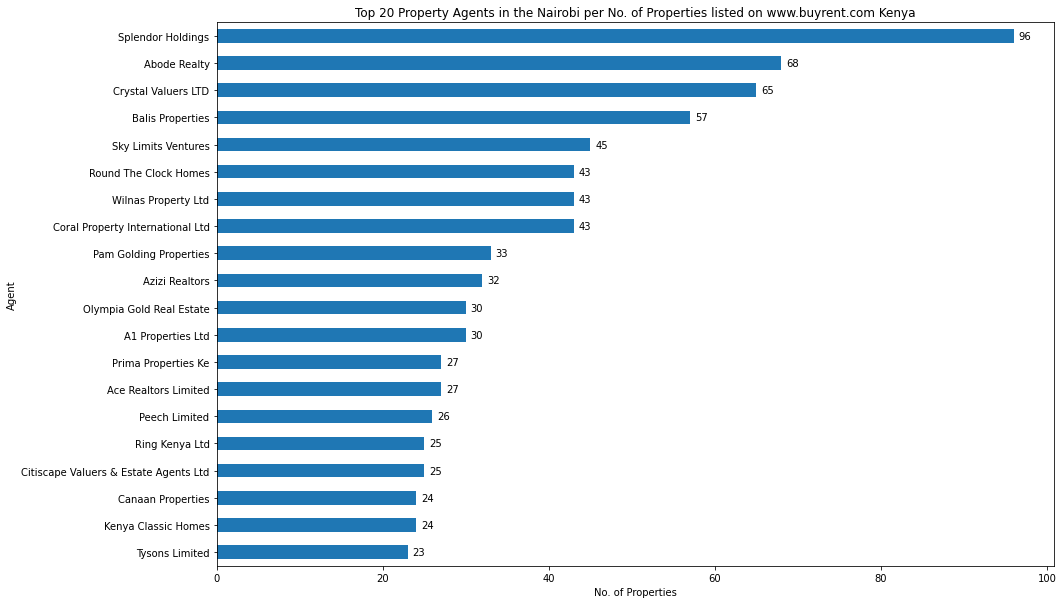

In [16]:
#top 20 agents
agent_ = agg_agent_df.head(20)

# Bring some raw data.
frequencies = agent_['property_price_amount_count']

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
#freq_series = pd.Series.from_array(frequencies)

y_labels = agent_['property_agent']

# Plot the figure.
plt.figure(figsize=(15, 10))
ax = frequencies.plot(kind='barh')
ax.invert_yaxis()
ax.set_title('Top 20 Property Agents in the Nairobi per No. of Properties listed on www.buyrent.com Kenya')
ax.set_xlabel('No. of Properties')
ax.set_ylabel('Agent')
ax.set_yticklabels(y_labels)
#ax.set_xlim(0, 300) # expand xlim to make labels easier to read

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    
      # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig("./data/agents_distribution.png")

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Top 20 Property Agents in the Nairobi per Average Price as listed on www.buyrent.com Kenya')

Text(0.5, 0, 'Avg. Property Prices')

Text(0, 0.5, 'Agent')

[Text(0, 0, 'Coral Property International Ltd'),
 Text(0, 1, 'A1 Properties Ltd'),
 Text(0, 2, 'Pam Golding Properties'),
 Text(0, 3, 'Olympia Gold Real Estate'),
 Text(0, 4, 'Wilnas Property Ltd'),
 Text(0, 5, 'Azizi Realtors'),
 Text(0, 6, 'Sky Limits Ventures'),
 Text(0, 7, 'Peech Limited'),
 Text(0, 8, 'Balis Properties'),
 Text(0, 9, 'Tysons Limited'),
 Text(0, 10, 'Kenya Classic Homes'),
 Text(0, 11, 'Canaan Properties'),
 Text(0, 12, 'Splendor Holdings'),
 Text(0, 13, 'Abode Realty'),
 Text(0, 14, 'Crystal Valuers LTD'),
 Text(0, 15, 'Prima Properties Ke'),
 Text(0, 16, 'Citiscape Valuers & Estate Agents Ltd'),
 Text(0, 17, 'Ace Realtors Limited'),
 Text(0, 18, 'Round The Clock Homes'),
 Text(0, 19, 'Ring Kenya Ltd')]

Text(5, 0, '26362558')

Text(5, 0, '24246667')

Text(5, 0, '21834848')

Text(5, 0, '21705000')

Text(5, 0, '17993023')

Text(5, 0, '17412500')

Text(5, 0, '16486667')

Text(5, 0, '16276923')

Text(5, 0, '15900702')

Text(5, 0, '15410870')

Text(5, 0, '15345833')

Text(5, 0, '15320833')

Text(5, 0, '14846875')

Text(5, 0, '14504265')

Text(5, 0, '13357538')

Text(5, 0, '13079630')

Text(5, 0, '11222800')

Text(5, 0, '10416667')

Text(5, 0, '9587907')

Text(5, 0, '9352000')

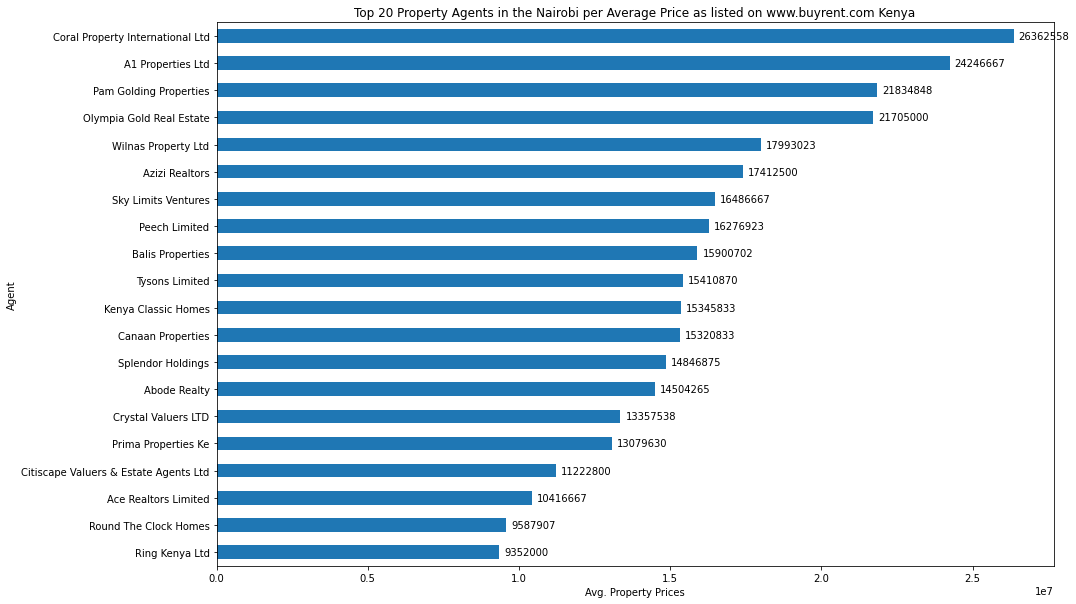

In [17]:
#sorting the properties in descending order
agg_agent_df = agg_agent_df.sort_values(by='property_price_amount_mean', ascending = False)

#top 20 agents
agent_ = agg_agent_df.head(20)

# Bring some raw data.
frequencies = agent_['property_price_amount_mean']

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
#freq_series = pd.Series.from_array(frequencies)

y_labels = agent_['property_agent']

# Plot the figure.
plt.figure(figsize=(15, 10))
ax = frequencies.plot(kind='barh')
ax.invert_yaxis()
ax.set_title('Top 20 Property Agents in the Nairobi per Average Price as listed on www.buyrent.com Kenya')
ax.set_xlabel('Avg. Property Prices')
ax.set_ylabel('Agent')
ax.set_yticklabels(y_labels)
#ax.set_xlim(0, 300) # expand xlim to make labels easier to read

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    
      # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig("./data/agents_distribution_per_avg_price.png")

In [18]:
data.to_csv("./data/scappered_nairobi_data.csv")

PermissionError: [Errno 13] Permission denied: './data/scappered_nairobi_data.csv'